In [17]:
import datasets as k
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, f_classif, mutual_info_classif, SelectPercentile, SelectFwe
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import importlib
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
import xgboost as xgb
importlib.reload(k)
import random
random.seed(100)

**In this notebook I did a large amount of feature selection, hyperparameter tuning**

In [15]:
importlib.reload(k)
x, y, e = k.q4a()
x.shape

(9846, 75)

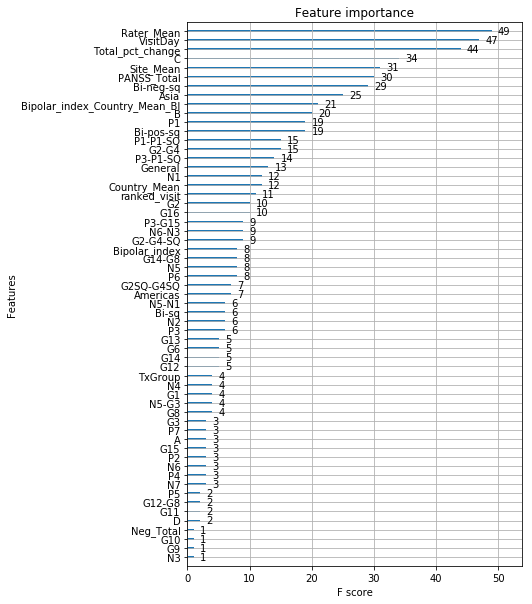

CV score:  0.799042455006922
Forest score:  0.8157360406091371
MSE:  0.18426395939086293
ROC_AUC:  0.737010248771923
[[ 318  268]
 [  95 1289]]
1    1647
0     315
dtype: int64
1    1557
0     413
dtype: int64


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y)
model = XGBClassifier()
model.fit(x_train, y_train)
# plot feature importance
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(6, 10)
pyplot.show()
predict = model.predict(x_test)
score = model.score(x_test, y_test)
print("CV score: ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))
print("Forest score: ", score)
print("MSE: ", mean_squared_error(y_test, predict))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
probabilities = model.predict_proba(e)
print("ROC_AUC: ", roc_auc)
print(confusion_matrix(y_test, predict))
predicted = model.predict(e)
print(pd.Series(predicted).value_counts())
print(pd.Series(predict).value_counts())

In [13]:
print(y.value_counts())
print(182400/17327)

1    15503
0     2496
Name: Passed, dtype: int64
10.526923298897675


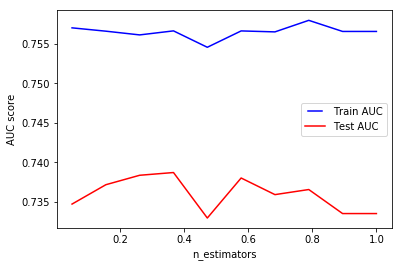

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
n_estimators = [1, 2, 3, 4, 5, 6, 7, 8, 10]
n_estimators = np.linspace(0.05, 1, 10, endpoint=True)
train_results = []
test_results = []
for estimator in n_estimators:
   rf = XGBClassifier(gamma=estimator, min_child_weight=4, scale_pos_weight=0.14)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

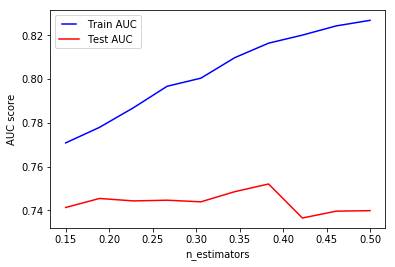

In [7]:
n_estimators = np.linspace(0.15, 0.5, 10, endpoint=True)
train_results = []
test_results = []
for estimator in n_estimators:
   rf = XGBClassifier(learning_rate=estimator, min_child_weight=4, scale_pos_weight=0.14)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [14]:
a,b,c = k.gbc(x, y, e)

CV score:  0.8600021026275128
GBC Classifier:  0.8758333333333334
MSE:  0.12416666666666666
ROC_AUC:  0.5906347513883441
CONFUSION MATRIX: 
 [[  98  405]
 [  42 3055]]
1    1833
0     129
dtype: int64
1    3460
0     140
dtype: int64


In [15]:
a,b,c = k.xgb(x, y, e)

CV score:  0.8758362257857579
XGB Classifier: 88.25%
MSE:  0.1175
ROC_AUC:  0.5842878971780311
CONFUSION MATRIX: 
 [[  85  387]
 [  36 3092]]
1    1854
0     108
dtype: int64
1    3479
0     121
dtype: int64


In [15]:
predicted = k.predict(a)

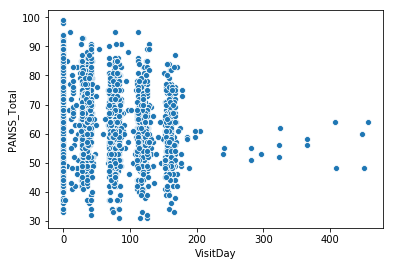

In [20]:
sns.scatterplot("VisitDay", "PANSS_Total", data=e)

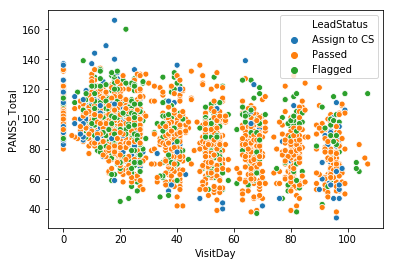

In [13]:
study_a = pd.read_csv("Study_A.csv")
sns.scatterplot("VisitDay", "PANSS_Total", data=study_a, hue="LeadStatus")

In [18]:
predicted.to_csv("class2.csv", index=False)

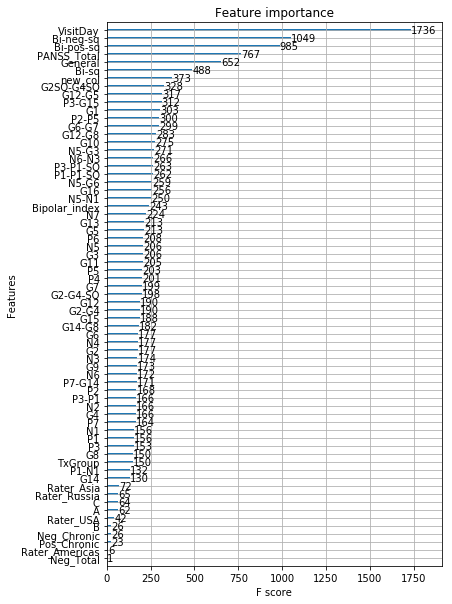

CV score:  0.8752777777777776
Forest score:  0.8877777777777778
MSE:  0.11222222222222222
ROC_AUC:  0.6561008768948406
[[ 161  309]
 [  95 3035]]
1    1848
0     114
dtype: int64
1    3344
0     256
dtype: int64


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
model = XGBClassifier(max_depth=13, learning_rate=0.3)
model.fit(x_train, y_train)
# plot feature importance
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(6, 10)
pyplot.show()
predict = model.predict(x_test)
score = model.score(x_test, y_test)
print("CV score: ", np.mean(cross_val_score(model, x_test, y_test, cv=5)))
print("Forest score: ", score)
print("MSE: ", mean_squared_error(y_test, predict))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
probabilities = model.predict_proba(e)
print("ROC_AUC: ", roc_auc)
print(confusion_matrix(y_test, predict))
predicted = model.predict(e)
print(pd.Series(predicted).value_counts())
print(pd.Series(predict).value_counts())

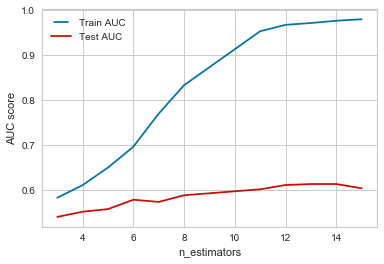

In [195]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
n_estimators = [3, 4, 5, 6, 7, 8, 11, 12, 13 ,14 , 15]
#n_estimators = np.linspace(0.7, 1, 30, endpoint=True)
train_results = []
test_results = []
for estimator in n_estimators:
   rf = XGBClassifier(max_depth = estimator)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

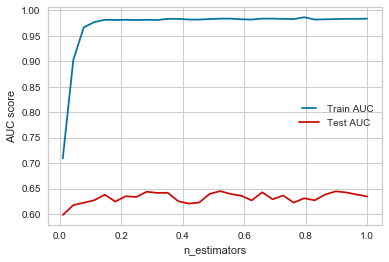

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
#n_estimators = [1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 25, 30]
n_estimators = np.linspace(0.01, 1, 30, endpoint=True)
train_results = []
test_results = []
for estimator in n_estimators:
   rf = XGBClassifier(max_depth=13, learning_rate=estimator)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
# data = pd.concat([x,y], axis=1)

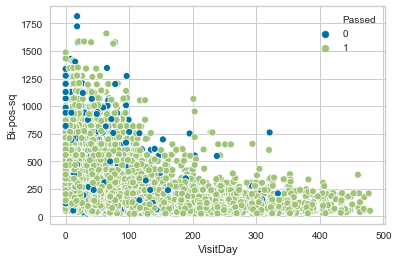

In [123]:
sns.scatterplot(x= "VisitDay", y="Bi-pos-sq",data= data, hue="Passed")

In [168]:
data = pd.concat([x,y], axis=1)
data[(data["VisitDay"]>=230) & (data["Passed"] !=0)].shape

(1163, 58)

In [158]:
study_a = pd.read_csv("Study_A.csv")
study_b = pd.read_csv("Study_B.csv")
study_c = pd.read_csv("Study_C.csv")
study_d = pd.read_csv("Study_D.csv")
study_e = pd.read_csv("Study_E.csv")

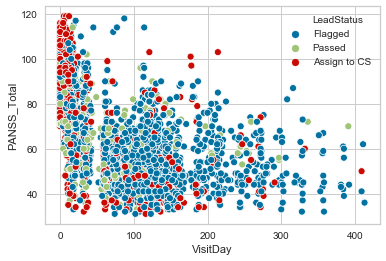

In [171]:
sns.scatterplot(x= "VisitDay", y="PANSS_Total",data= study_d, hue="TxGroup")